In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv")

In [3]:
df

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [6]:
numerical_variables=df.select_dtypes(include=['number'])
categorical_variables = df.select_dtypes(include=['object'])

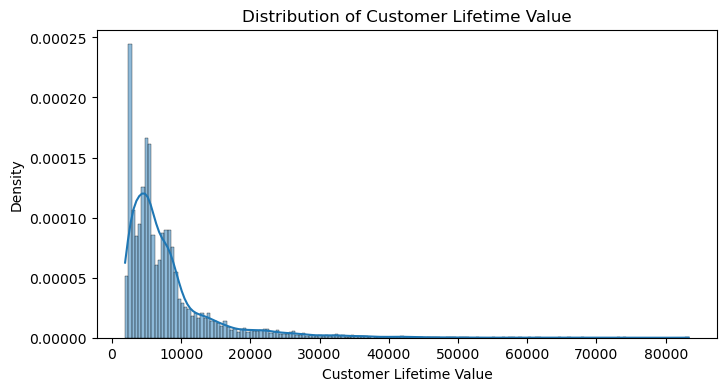

Normality test (p-value) for Customer Lifetime Value: 0.0
Exponential fit test (p-value) for Customer Lifetime Value: 6106.932799987081



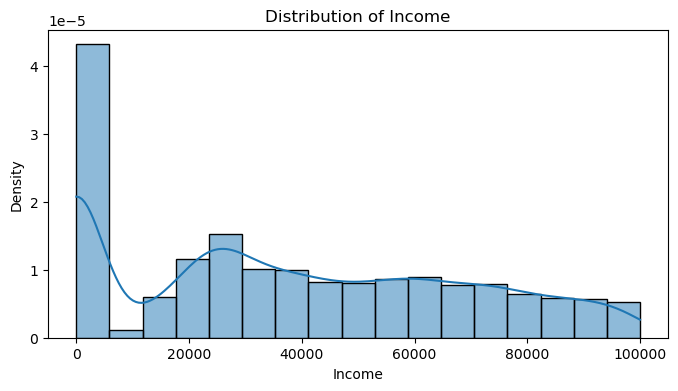

Normality test (p-value) for Income: 0.0
Exponential fit test (p-value) for Income: 37657.38000875848



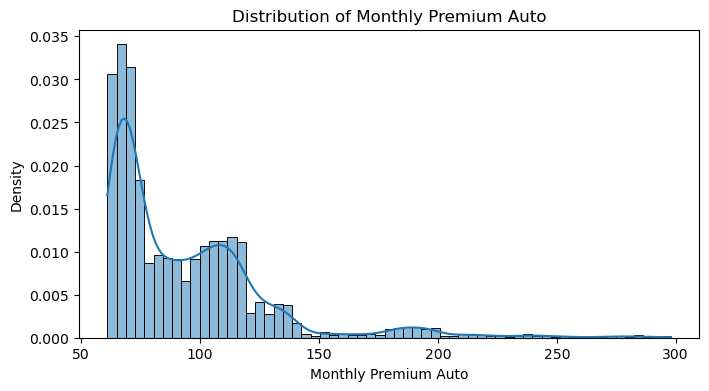

Normality test (p-value) for Monthly Premium Auto: 0.0
Exponential fit test (p-value) for Monthly Premium Auto: 32.21929056273265



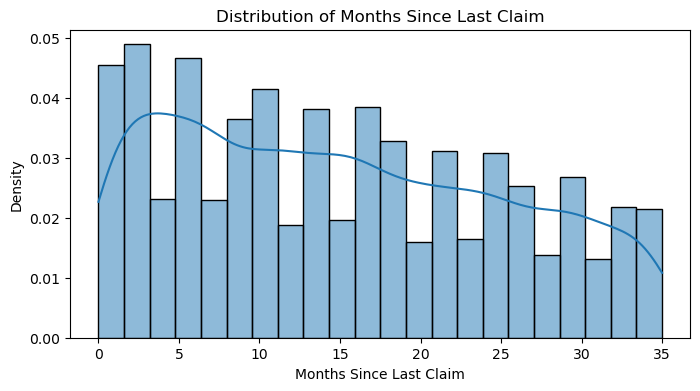

Normality test (p-value) for Months Since Last Claim: 0.0
Exponential fit test (p-value) for Months Since Last Claim: 15.097000218962119



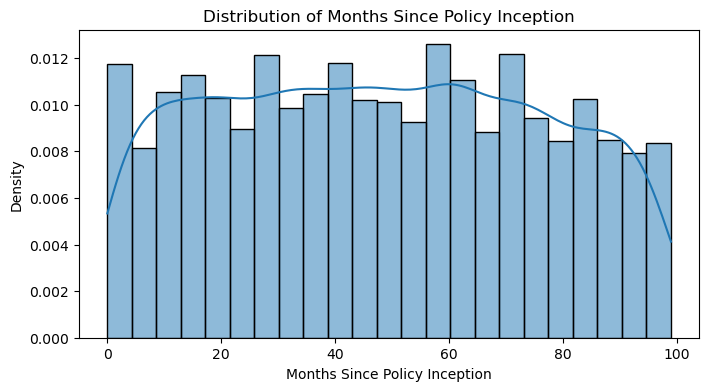

Normality test (p-value) for Months Since Policy Inception: 0.0
Exponential fit test (p-value) for Months Since Policy Inception: 48.064593825268226



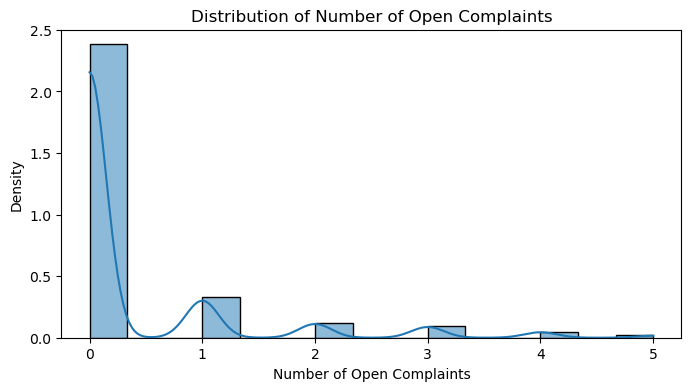

Normality test (p-value) for Number of Open Complaints: 0.0
Exponential fit test (p-value) for Number of Open Complaints: 0.38438800087584846



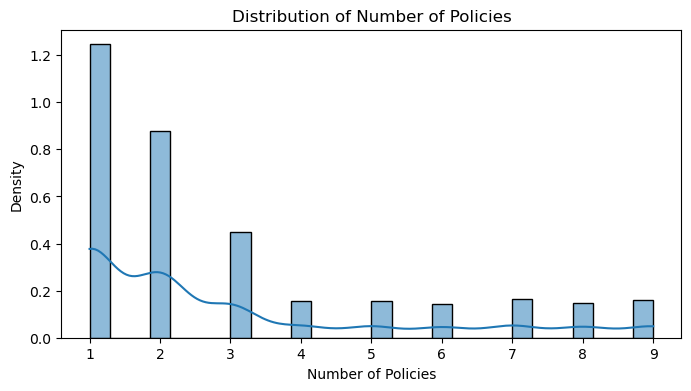

Normality test (p-value) for Number of Policies: 0.0
Exponential fit test (p-value) for Number of Policies: 1.9661703525290126



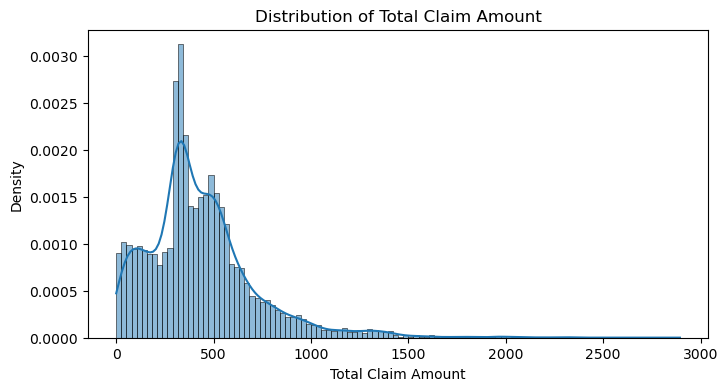

Normality test (p-value) for Total Claim Amount: 0.0
Exponential fit test (p-value) for Total Claim Amount: 433.9897873128969



In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

for col in numerical_variables.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, stat="density")
    plt.title(f'Distribution of {col}')
    plt.show()

    _, p_value = stats.normaltest(df[col])
    print(f'Normality test (p-value) for {col}: {p_value}')

    _, p_value_exp = stats.expon.fit(df[col])
    print(f'Exponential fit test (p-value) for {col}: {p_value_exp}\n')


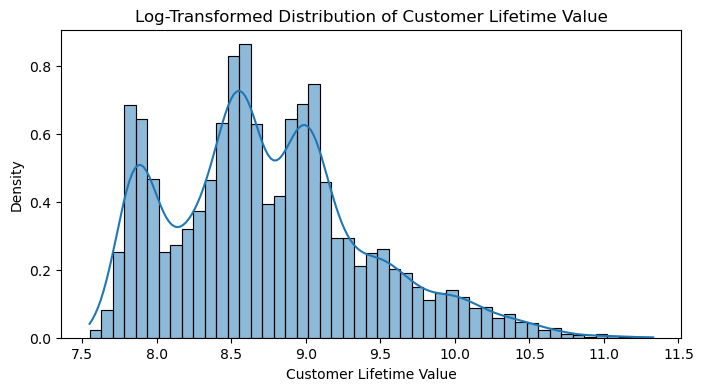

Normality test (p-value) after log-transform for Customer Lifetime Value: 1.4314539691070362e-96

Cannot perform log-transform on Income as it contains non-positive values.



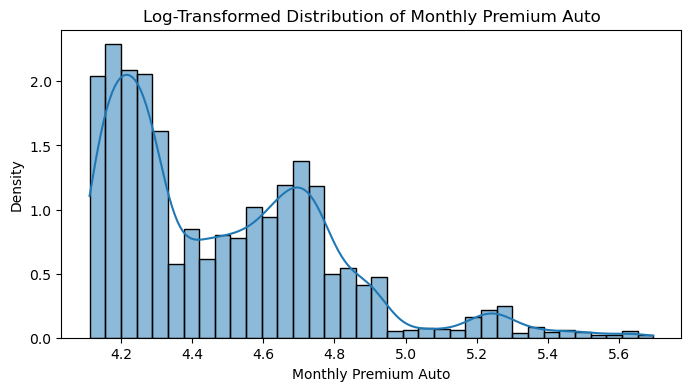

Normality test (p-value) after log-transform for Monthly Premium Auto: 3.6763161762361196e-268

Cannot perform log-transform on Months Since Last Claim as it contains non-positive values.

Cannot perform log-transform on Months Since Policy Inception as it contains non-positive values.

Cannot perform log-transform on Number of Open Complaints as it contains non-positive values.



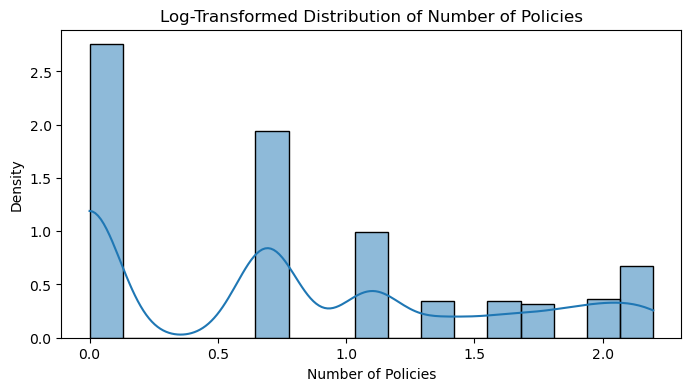

Normality test (p-value) after log-transform for Number of Policies: 0.0



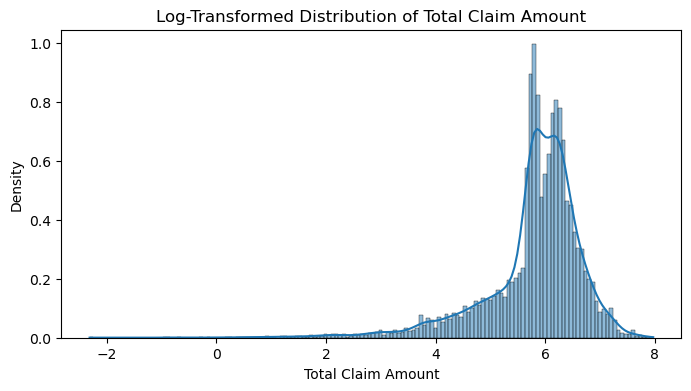

Normality test (p-value) after log-transform for Total Claim Amount: 0.0



In [9]:
for col in numerical_variables.columns:
    if (df[col] > 0).all(): 
        log_transformed = np.log(df[col])
        plt.figure(figsize=(8, 4))
        sns.histplot(log_transformed, kde=True, stat="density")
        plt.title(f'Log-Transformed Distribution of {col}')
        plt.show()

       
        _, p_value_log = stats.normaltest(log_transformed)
        print(f'Normality test (p-value) after log-transform for {col}: {p_value_log}\n')
    else:
        print(f'Cannot perform log-transform on {col} as it contains non-positive values.\n')
